# Clase 6 - Intro Manipulacion de datos con Pandas II
### Resumen

*   Operaciones con Datos en Pandas
*   Introduccion a Series de Tiempo

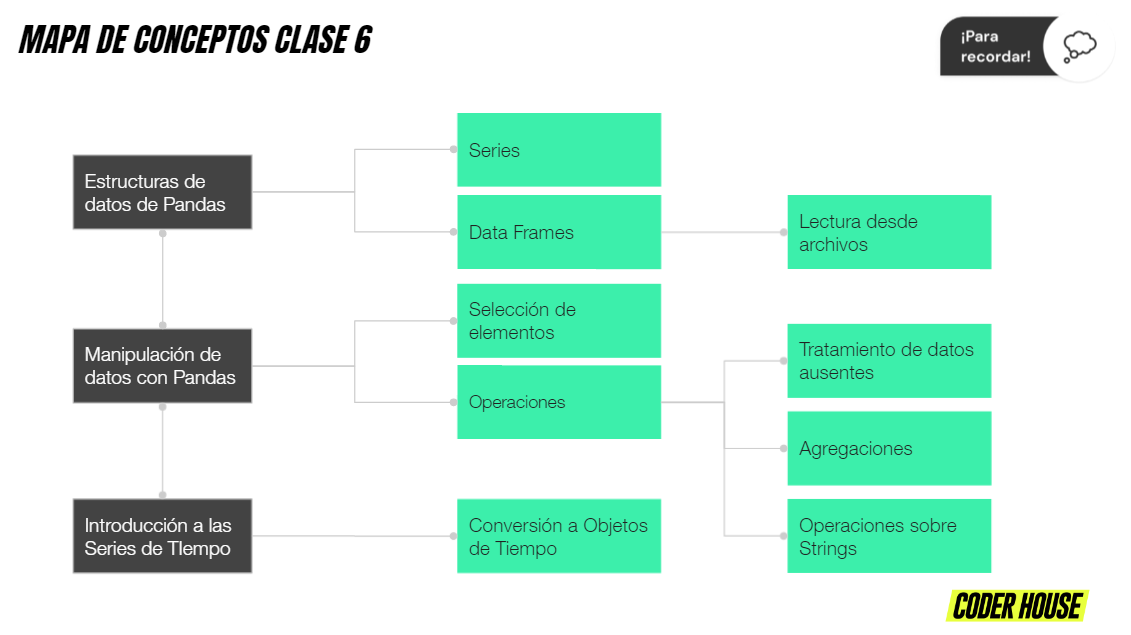

In [ ]:
import pandas as pd
import numpy as np

In [ ]:
df_lluvias_archivo = pd.read_csv('../input/rainpune65-20/pune_1965_to_2002.csv')

In [ ]:
df_lluvias_archivo.head() # Exploramos el dataset utilizando el metodo head. 

In [ ]:
indice = list(df_lluvias_archivo.Year)  # Guardamos la primer columna, llamada "Year" como indices

In [ ]:
columnas = df_lluvias_archivo.columns[1:] # Guardamos toda la primera fila, como columnas

In [ ]:
valores = df_lluvias_archivo.values[:,1:] # Guardamos en arreglo todos los valores, excepto los de la primera columna

In [ ]:
df_lluvias = pd.DataFrame(valores, index=indice, columns=columnas) # Ensamblamos las partes utilizando Pandas DataFrame. 

In [ ]:
df_lluvias

In [ ]:
df_lluvias.sum() # Suma de precipitaciones de cada mes

In [ ]:
df_lluvias.mean(axis='columns') # Promedio de precipitaciones de cada año

In [ ]:
# Metodo 'describe' : Podemos obtener un breve resumen el data frame con describe()
df_lluvias.describe()

In [ ]:
# Es posible redondear los numeros utilizando el metodo 'round()'
df_lluvias.describe().round(1)

In [ ]:
# Si utilizamos el metodo de transposicion, con describe() podemos ver el resumen por año
df_lluvias.T.describe().round(1)

**Operaciones sobre Strings**

In [ ]:
Presidentes_archivo = pd.read_csv('../input/us-presidents/us_presidents.csv')

In [ ]:
Presidentes_nombres = pd.Series(Presidentes_archivo['president'])
Presidentes_nombres

In [ ]:
# Convertir a Mayusculas
Presidentes_nombres.str.upper()

In [ ]:
# medimos la longitud total
Presidentes_nombres.str.len()

In [ ]:
# Evaluamos si comienzan con una determinada letra
def BuscandoInicial(arr):
  Inicial = str(input('Ingrese una letra inicial del nombre del presidente: '))
  print(arr.str.startswith(Inicial))

def SeparandoEspacios(arr):
  print(arr.str.split())



In [ ]:
BuscandoInicial(Presidentes_nombres)

In [ ]:
SeparandoEspacios(Presidentes_nombres)

---
**Introduccion a Series de Tiempo**

...datos, ligados al tiempo

* Son tipos de datos especiales donde el tiempo toma un rol fundamental.
* Observamos cambios en los valores de la variable a lo largo del tiempo.
* Si ignoramos esa dimensión temporal, los valores pierden contexto


* Python provee tres tipos de datos relacionados al tiempo:
** Time stamp o marca de tiempo: representan un punto en el tiempo. Por ejemplo, fecha y hora.
** Período: representan un intervalo de tiempo. Por ejemplo, los minutos transcurridos desde que comenzó la clase hasta ahora.
** Duración: representa una duración medida en tiempo, pero independientemente del momento en que sucede. Por ejemplo, 15 minutos.



---



**Pandas y Series de Tiempo**

Pandas provee un objeto indice para cada uno de esos objetos temporales. 

| Tipo de Dato | Objeto en Python | Indice en Pandas |
| --- | --- | --- |
| Time Stamp | Timestamp | DateTimeIndex |
| Periodo | Period | PeriodIndex |
| Duracion | Timedelta | TimeDeltaIndex |

---
**Operando Objetos de Tiempo**



In [ ]:
# Convertir String a Timestamp
fecha = pd.to_datetime('03/01/2020', dayfirst=True)
fecha

In [ ]:
# Periodo, ejemplo 3 de enero del 2020 a 10 de enero del 2020
fin = pd.to_datetime('10/01/2020', dayfirst=True)
fechas_1 = pd.date_range(start=fecha, end=fin)
fechas_1

In [ ]:
# Periodo con 8 fechas desde el 3 de enero de 2020
# Por defecto, la frecuencia es de un dia, por lo tanto, 8 periodos son 8 dias. 
fechas_2 = pd.date_range(start=fecha, periods=8)
fechas_2

In [ ]:
# Cambiando la frecuencia a meses en lugar de dias
# Como dia, se toma el ultimo dia de cada periodo
fechas_3 = pd.date_range(start=fecha, periods=8, freq='M')
fechas_3

In [ ]:
# 8 meses consecutivos, a partir del mes de inicio
mes_inicio = fecha.strftime('%Y-%m')
mes_inicio

In [ ]:
fechas_4 = pd.period_range(start = mes_inicio, periods=8, freq='M')
fechas_4

In [ ]:
# cuanto tiempo paso desde el primer periodo al ultimo?
cuanto_tiempo = fechas_3[7] - fechas_3[0]
cuanto_tiempo

In [ ]:
# cuantos meses pasaron desde el primer periodo al ultimo?
cuanto_tiempo_meses = fechas_3[7].to_period('M') - fechas_3[0].to_period('M')
cuanto_tiempo_meses 

**Ejercicio de Time Index con el Dataset de Presidentes**

In [ ]:
# Conversion a DataTimeIndex. 
# Seleccionamos las fechas de asuncion y luego Transformamos las fechas de formato string a indices de tiempo
fechas_presidentes_orig = Presidentes_archivo['start']
print(type(fechas_presidentes_orig)) # Las fechas se encuentran en un formato incorrecto
fechas_presidentes = pd.DatetimeIndex(fechas_presidentes_orig)

print(type(fechas_presidentes)) # Estas fechas se encuentran en un formato correcto

In [ ]:
fechas_presidentes

In [ ]:
# Ahora que las fechas se encuentran en formato correcto, podemos construir una serie
Serie_presidentes = pd.Series(Presidentes_nombres.values, index=fechas_presidentes)
Serie_presidentes

---
**EJERCICIO DE CLASE 1**

Utilice la serie anterior para obtener un listado de los presidentes que gobernaron desde 1850 hasta 1901 inclusive.

In [ ]:
Serie_presidentes.loc['1850':'1901']

---
**EJERCICIO DE CLASE 2**

* Que dia de la semana fue el 3 de agosto de 1850. 
* Responder cuantos segundos pasaron desde esa fecha hasta hoy

Pista, usar la libreria datatime para extraer la fecha de hoy

In [ ]:
today = pd.to_datetime("today")
past = pd.to_datetime('1850-08-03')
time_array = pd.date_range(start=past, end=today)
past.day_name()

In [ ]:
cuantos_segundos = time_array[-1].to_period('s') - time_array[0].to_period('s')
cuantos_segundos